<a href="https://colab.research.google.com/github/alebos-source/solid-octo-barnacle/blob/pro/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

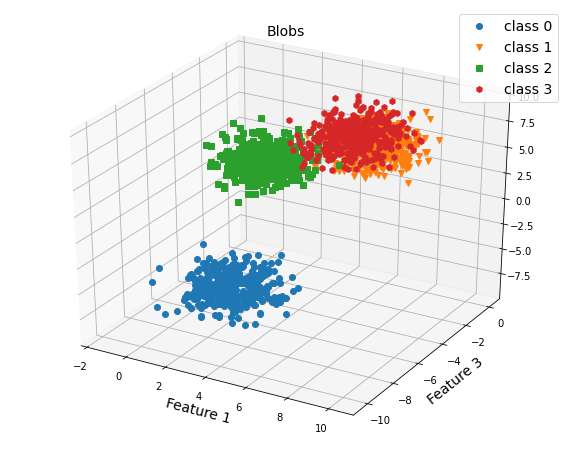

In [16]:
%matplotlib inline
#standard imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#function for fast generation of training and test set from data
from sklearn.model_selection import train_test_split
#generators of very simple datasets
from sklearn.datasets import make_blobs, make_moons
#logistic regression model
from sklearn.linear_model import LogisticRegression


#fix parameters
N = 2000 #number of observations
D = 3 # features per sample
test_size = .25 #test data are 25%

#random numbers genereator initial state
rnd_state = 3352561
np.random.seed(rnd_state)

#generate two blobs, one for each class, of 3D data (4 classes)
X_blob, y_blob = make_blobs(n_samples=N, n_features=D, centers=4)

#generate training and test set
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=test_size)

#plot the blob dataset
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
fontsize = 14

#plot the points of the first class:
mask = y_blob_train == 0
#plot first feature on x-axis, second feature on y-axis, third on z
ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], X_blob_train[mask][:,2],'o', label='class 0') 

#plot the points of the second class:
mask = y_blob_train == 1
#plot first feature on x-axis, second feature on y-axis, third on z
ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], X_blob_train[mask][:,2], 'v', label='class 1')

#plot the points of the third class:
mask = y_blob_train == 2
#plot first feature on x-axis, second feature on y-axis, third on z
ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], X_blob_train[mask][:,2], 's', label='class 2')

#plot the points of the fourth class:
mask = y_blob_train == 3
#plot first feature on x-axis, second feature on y-axis, third on z
ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], X_blob_train[mask][:,2], 'h', label='class 3')

ax.legend(fontsize=fontsize)
ax.set_xlabel('Feature 1', fontsize=fontsize)
ax.set_ylabel('Feature 2', fontsize=fontsize)
ax.set_ylabel('Feature 3', fontsize=fontsize)
ax.set_title('Blobs', fontsize=fontsize);

In [23]:
#preprocessing
from sklearn import preprocessing
#standardization
train_scaler = preprocessing.StandardScaler().fit(X_blob_train)
test_scaler = preprocessing.StandardScaler().fit(X_blob_test)

#standardized data
X_blob_train_scaled = train_scaler.transform(X_blob_train)
X_blob_test_scaled = test_scaler.transform(X_blob_test)

#training
clf = LogisticRegression(random_state=10).fit(X_blob_train_scaled, y_blob_train)

clf_class = clf.predict(X_blob_test_scaled)

clf_probs = clf.predict_proba(X_blob_test_scaled)

clf_score = clf.score(X_blob_test_scaled, y_blob_test)

cfr = clf_class - y_blob_test

print(clf_class)
print(cfr)
print(clf_probs)
clf_score

[2 3 0 0 2 3 2 3 3 0 3 2 1 3 0 0 2 1 0 2 3 2 0 1 3 2 0 2 3 3 0 1 0 0 0 3 1
 0 2 3 0 1 1 0 0 3 0 3 3 3 2 1 0 0 3 0 1 3 1 0 0 2 3 3 3 3 1 1 2 2 2 2 2 0
 3 1 1 0 1 2 1 3 3 1 0 2 0 0 0 1 0 0 1 0 0 2 3 3 2 2 3 0 1 3 0 1 2 1 3 2 2
 0 2 0 3 1 3 3 2 2 3 0 3 1 3 2 3 2 2 3 2 2 3 3 3 2 3 2 1 1 3 0 2 2 0 2 3 0
 1 1 2 3 0 1 3 1 2 2 0 0 2 3 0 2 3 2 1 1 1 1 1 2 2 0 3 3 2 2 1 0 0 0 0 0 3
 2 0 3 3 2 0 1 0 2 3 3 0 0 2 3 0 2 2 1 3 3 0 3 1 2 1 3 0 2 0 1 0 2 2 3 1 2
 3 1 3 2 3 0 1 0 1 0 3 1 1 2 1 1 1 2 0 1 3 0 3 0 1 0 3 0 3 0 1 3 3 1 0 1 3
 0 1 0 1 1 1 0 2 3 3 1 1 3 3 1 1 3 1 1 0 0 2 0 0 2 2 2 2 2 0 1 0 0 1 2 0 3
 1 0 0 2 0 3 0 0 2 2 0 0 1 2 1 2 1 1 0 0 0 2 2 0 1 0 0 3 3 2 3 3 1 2 2 0 0
 0 3 2 0 0 0 0 2 0 1 1 1 0 0 1 1 0 2 2 1 1 1 1 2 3 0 1 1 1 0 2 1 1 2 0 1 1
 2 1 1 2 2 2 0 1 1 3 0 3 1 2 1 1 3 0 2 0 2 0 3 3 2 1 0 1 0 1 3 2 0 3 0 0 0
 1 3 1 2 1 0 1 2 2 3 3 2 3 1 1 1 1 1 2 1 3 3 2 3 1 3 3 0 0 2 2 2 1 3 1 2 0
 2 3 3 1 0 1 1 2 1 2 3 2 2 1 0 3 2 3 3 0 2 3 1 2 0 1 0 1 0 0 0 2 2 3 2 3 2
 0 0 3 2 1 0 2 1 3 0 3 1 

0.96